In [509]:
# 1. Investigating the missing data: decide if imputation is possible
# Columns: CARRIER, CARRIER_NAME, MANUFACTURE_YEAR, NUMBER_OF_SEATS, CAPACITY_IN_POUNDS, AIRLINE_ID

In [510]:
# Specify which version of scipy and seaborn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
!pip install scikit-learn
from sklearn.impute import SimpleImputer

In [511]:
aircraft = pd.read_csv('/content/T_F41SCHEDULE_B43 2.csv')
aircraft.head()
aircraft.info()

<ipython-input-511-5dc6f0bfa6e9>:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  aircraft = pd.read_csv('/content/T_F41SCHEDULE_B43 2.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132313 entries, 0 to 132312
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   YEAR                 132313 non-null  int64  
 1   CARRIER              132264 non-null  object 
 2   CARRIER_NAME         132208 non-null  object 
 3   MANUFACTURE_YEAR     132310 non-null  float64
 4   UNIQUE_CARRIER_NAME  132208 non-null  object 
 5   SERIAL_NUMBER        132313 non-null  object 
 6   TAIL_NUMBER          132313 non-null  object 
 7   AIRCRAFT_STATUS      132313 non-null  object 
 8   OPERATING_STATUS     132313 non-null  object 
 9   NUMBER_OF_SEATS      132306 non-null  float64
 10  MANUFACTURER         132313 non-null  object 
 11  AIRCRAFT_TYPE        102380 non-null  object 
 12  MODEL                132302 non-null  object 
 13  CAPACITY_IN_POUNDS   132212 non-null  float64
 14  ACQUISITION_DATE     131346 non-null  object 
 15  AIRLINE_ID       

**Question 1**

In [512]:
# Making copy of data for imputation/transformation/standardization
aircraft_copy = aircraft.copy()

In [513]:
# CARRIER

# Printing the rows where the Carrier is missing
aircraft_copy[aircraft_copy['CARRIER'].isnull()]

# Checking what the carrier means: it seems like NaN corresponds to North American Airlines
aircraft_copy[['CARRIER', 'CARRIER_NAME']].drop_duplicates().sort_values('CARRIER')


,CARRIER,CARRIER_NAME
36306,09Q,"Swift Air, LLC"
85907,09Q,"Swift Air, LLC d/b/a Eastern Air Lines d/b/a E..."
22117,0JQ,Vision Airlines
22144,0WQ,Avjet Corporation
0,16,PSA Airlines Inc.
...,...,...
29084,YX,Republic Airlines
7339,ZQ,Caribbean Sun Airlines
7345,ZW,Air Wisconsin Airlines Corp
29169,ZW,Air Wisconsin Airlines Corp


In [514]:
# Number of rows where the carrier name is "North American Airlines"
num_north_american = aircraft_copy[aircraft_copy['CARRIER_NAME'] == 'North American Airlines'].shape[0]

# Number of rows where the carrier name is not "North American Airlines"
print('Number of rows with the carrier name as North American Airlines:', num_north_american)

# Number of rows where carrier is missing (to see if it matches with the number of north american airlines)
num_missing = aircraft_copy[aircraft_copy['CARRIER'].isnull()].shape[0]
print('Number of rows with missing carriers: ', num_missing)

Number of rows with the carrier name as North American Airlines: 59
Number of rows with missing carriers:  49


In [515]:
# Since there is a mismatch of 10 rows, I am identifying the rows that have North American Airlines as the Carrier Name
# but don't have NaN as the Carrier: NA is also used for North American Airlines
mismatch = aircraft[
    (aircraft['CARRIER_NAME'] == 'North American Airlines') &
    (aircraft['CARRIER'].notnull())
]

display(mismatch)

# Confirmed that all 10 rows that have a missing Carrier are listed as NA with North American Airlines
# print(mismatch.shape[0])

,YEAR,CARRIER,CARRIER_NAME,MANUFACTURE_YEAR,UNIQUE_CARRIER_NAME,SERIAL_NUMBER,TAIL_NUMBER,AIRCRAFT_STATUS,OPERATING_STATUS,NUMBER_OF_SEATS,MANUFACTURER,AIRCRAFT_TYPE,MODEL,CAPACITY_IN_POUNDS,ACQUISITION_DATE,AIRLINE_ID,UNIQUE_CARRIER
26207,2009,NA,North American Airlines,1993.0,North American Airlines,26257,N760NA,B,Y,273.0,BOEING ...,NaN,B-767-3,104476.0,3/23/2004 12:00:00 AM,20415.0,NaN
26208,2009,NA,North American Airlines,1993.0,North American Airlines,27135,N764NA,B,Y,252.0,BOEING ...,NaN,B-767-3,103150.0,2/20/2009 12:00:00 AM,20415.0,NaN
26209,2009,NA,North American Airlines,1995.0,North American Airlines,26277,N750NA,B,Y,199.0,BOEING ...,NaN,B-757-2,58491.0,1/27/1995 12:00:00 AM,20415.0,NaN
26210,2009,NA,North American Airlines,1996.0,North American Airlines,28098,N765NA,B,Y,206.0,BOEING ...,NaN,B-767-3,94523.0,3/23/2006 12:00:00 AM,20415.0,NaN
26211,2009,NA,North American Airlines,1997.0,North American Airlines,28174,N752NA,B,Y,199.0,BOEING ...,NaN,B-757-2,58948.0,5/12/1999 12:00:00 AM,20415.0,NaN
26212,2009,NA,North American Airlines,2000.0,North American Airlines,30043,N755NA,B,Y,199.0,BOEING ...,NaN,B-757-2,56526.0,2/25/2003 12:00:00 AM,20415.0,NaN
26213,2009,NA,North American Airlines,2001.0,North American Airlines,29381,N754NA,B,Y,199.0,BOEING ...,NaN,B-757-2,58550.0,4/2/2001 12:00:00 AM,20415.0,NaN
26214,2009,NA,North American Airlines,2001.0,North American Airlines,32448,N756NA,B,Y,199.0,BOEING ...,NaN,B-757-2,58159.0,6/3/2001 12:00:00 AM,20415.0,NaN
26215,2009,NA,North American Airlines,2002.0,North American Airlines,27569,N767NA,B,Y,247.0,BOEING ...,NaN,B-767-3,105420.0,8/14/2002 12:00:00 AM,20415.0,NaN
26216,2009,NA,North American Airlines,2002.0,North American Airlines,29898,N768NA,B,Y,262.0,BOEING ...,NaN,B-767-3,103057.0,9/6/2002 12:00:00 AM,20415.0,NaN


In [516]:
# For Carrier, all missing value correspond to North American Airlines. There are also 10 rows for North American
# Airlines that correspond to a Carrier called "NA." Therefore, I am going to use simple imputation with a constant (NA)
# for all the "missing" values currently listed as "NaN."

constant_imputer = SimpleImputer(strategy='constant')
constant_imputer.fill_value = 'NA'

aircraft_copy['CARRIER'] = constant_imputer.fit_transform(aircraft_copy[['CARRIER']]).ravel()

# Confirming that all missing values were filled
print('Number of missing carrier values:', aircraft_copy['CARRIER'].isnull().sum())
print('Number of carrier values listed as NA: ', (aircraft_copy['CARRIER'] == 'NA').sum())
print(aircraft_copy['CARRIER'].unique())
print('Number of rows with North American Airlines: ', aircraft_copy[aircraft_copy['CARRIER_NAME'].str.strip() == 'North American Airlines'].shape[0])

# Still has a mismatch: from the printout, it seems like some of the codes have a space after the carrier
# To standardize the codes, I am going through and removing the space from the end of every carrier
aircraft_copy['CARRIER'] = aircraft_copy['CARRIER'].str.strip()
print(aircraft_copy['CARRIER'].unique())

# Now all of the NaN values are replaced with NA and match the previous code for North American Airlines
print('Number of rows with Carrier NA: ', (aircraft_copy['CARRIER'] == 'NA').sum())

Number of missing carrier values: 0
Number of carrier values listed as NA:  49
['16' '3Z' '5X' '5Y' '8C' '9E' '9S' 'AA' 'ABX' 'AJQ' 'AMQ' 'AQ' 'AS' 'AX'
 'B6' 'CO' 'CS' 'CTQ' 'DL' 'E0' 'ER' 'EV' 'F2' 'F9' 'FL' 'FX' 'G4' 'G7'
 'GFQ' 'GG' 'HA' 'HP' 'JW' 'KAQ' 'KLQ' 'L2' 'M6' 'MG' 'MQ' 'MRQ' 'NC' 'NK'
 'NW' 'OH' 'OO' 'OW' 'PCQ' 'PFQ' 'PO' 'PRQ' 'PT' 'QX' 'RD' 'SI' 'SLQ' 'SY'
 'TZ' 'U5' 'U7' 'UA' 'US' 'WI' 'WN' 'WO' 'X9' 'XE' 'XJ' 'XP' 'YV' 'YX'
 'ZQ' 'ZW' 'CP' 'E9' 'EZ' 'FE' 'L4' 'NA' 'RW' 'S5' 'SX' 'VX' 'WE' '9L'
 'FCQ' 'GL' '0JQ' '0WQ' '16 ' '3Z ' '5X ' '5Y ' '8C ' '9E ' '9L ' '9S '
 'AA ' 'AQ ' 'AS ' 'B6 ' 'CO ' 'CP ' 'CS ' 'DL ' 'ER ' 'EV ' 'EZ ' 'F9 '
 'FL ' 'FX ' 'G4 ' 'G7 ' 'GL ' 'HA ' 'JW ' 'L2 ' 'L3 ' 'M6 ' 'MQ ' 'NA '
 'NC ' 'NK ' 'NW ' 'OH ' 'OO ' 'OW ' 'PM ' 'PO ' 'PT ' 'QX ' 'RD ' 'S5 '
 'SI ' 'SY ' 'U5 ' 'U7 ' 'UA ' 'US ' 'VX ' 'WE ' 'WI ' 'WN ' 'WO ' 'X9 '
 'XE ' 'XJ ' 'XP ' 'YV ' 'YX ' 'ZW ' 'KH' 'L3' 'PM' '09Q' '1BQ' '1EQ' 'K8'
 'RP' '1TQ' '5V' 'WP' '20Q' 'KD' '23Q' '27Q'

In [517]:
# CARRIER_NAME

# Looking at the rows with null Carrier Names: It seems like all rows have valid "Carrier" values. Need to map these values to eachother
aircraft_copy[aircraft_copy['CARRIER_NAME'].isnull()]
# Found that there are 105 rows where the carrier name is missing
# print(aircraft[aircraft['CARRIER_NAME'].isnull()].shape[0])

# Mapping carrier to carrier name
map = aircraft_copy[['CARRIER', 'CARRIER_NAME']].dropna().drop_duplicates()

# Seeing whcih carrier codes have missing carrier_name values: from this only OH and L4 are missing
print(aircraft_copy[aircraft_copy['CARRIER_NAME'].isnull()]['CARRIER'].value_counts())

# Checking to see what Carrier Name OH and L4 map to: from this, I can see that there are two carrier names for the "OH" Carrier
print(aircraft_copy[aircraft_copy['CARRIER'].isin(['OH', 'L4'])][['CARRIER', 'CARRIER_NAME']].drop_duplicates().sort_values('CARRIER'))

# Exporting the rows with OH as a Carrier to inspect what the difference is: found that all the missing values are from 2013
OH_rows = aircraft_copy[aircraft_copy['CARRIER'] == 'OH']
OH_rows.to_csv('OH_carrier_rows.csv', index=False)

# Checking that the number of rows where Carrier Name is missing matches the number of rows where the year is 2013
num_2013 = aircraft_copy[(aircraft_copy['CARRIER'] == 'OH') & (aircraft_copy['YEAR'] == 2013)].shape[0]
print("Total number of rows with carrier 'OH' in 2013: ", num_2013)

OH_missing = aircraft_copy[(aircraft_copy['CARRIER'] == 'OH') & (aircraft_copy['CARRIER_NAME'].isnull())].shape[0]
print("Number of rows where the Carrier Name is missing and the Carrier is 'OH': ", OH_missing)

OH_2010_2016 = aircraft_copy[(aircraft_copy['YEAR'] >= 2010) & (aircraft_copy['YEAR'] <= 2016) & (aircraft_copy['CARRIER'] == 'OH')]
print(OH_2010_2016[['YEAR', 'CARRIER', 'CARRIER_NAME', 'MODEL']])

OH_2013 = aircraft_copy[(aircraft_copy['YEAR'] == 2013) & (aircraft_copy['CARRIER'] == 'OH')]
print(OH_2013[['YEAR', 'CARRIER', 'CARRIER_NAME', 'MODEL']])

# It appears that the rows that are missing are all in 2013. The years prior to and including 2011 are labeled as Comair Inc., and the years
# after and including 2015 are labeled as PSA Airlines Inc. With further inspection of the data, the model stayed the same from 2011 through 2013
# ("CRJ100-Passanger") and switched to "CRJ701" once the carrier name changed in 2015. Therefore, it seems most likely that the carrier name during
# that year was still Comair Inc.. Simple Imputation with a constant can be used to replace the missing values with Comair Inc.

location = (aircraft_copy['CARRIER'] == 'OH') & (aircraft_copy['CARRIER_NAME'].isnull())
aircraft_copy.loc[location, 'CARRIER_NAME'] = 'Comair Inc.'

# Checking that all missing values were filled
print('Remaining null values: ', aircraft_copy['CARRIER_NAME'].isnull().sum())
# Still 8 that haven't been replaced: L4 Carriers

print(aircraft_copy[(aircraft_copy['CARRIER'] == 'OH') & (aircraft_copy['YEAR'] == 2013)][['YEAR', 'CARRIER', 'CARRIER_NAME']])
# From this, can see that all the NaN values in 2013 have been cahnged to Comair Inc.

CARRIER
OH    97
L4     8
Name: count, dtype: int64
      CARRIER                           CARRIER_NAME
11465      L4                                    NaN
18739      L4  Lynx Aviation d/b/a Frontier Airlines
4896       OH                            Comair Inc.
54610      OH                                    NaN
68915      OH                      PSA Airlines Inc.
Total number of rows with carrier 'OH' in 2013:  97
Number of rows where the Carrier Name is missing and the Carrier is 'OH':  97
       YEAR CARRIER       CARRIER_NAME             MODEL
33726  2010      OH        Comair Inc.  CRJ100-Passanger
33727  2010      OH        Comair Inc.  CRJ100-Passanger
33728  2010      OH        Comair Inc.  CRJ100-Passanger
33729  2010      OH        Comair Inc.  CRJ100-Passanger
33730  2010      OH        Comair Inc.  CRJ100-Passanger
...     ...     ...                ...               ...
76153  2016      OH  PSA Airlines Inc.            CRJ900
76154  2016      OH  PSA Airlines Inc.      

In [518]:
print(aircraft_copy[(aircraft_copy['CARRIER'] == 'L4')][['YEAR', 'CARRIER', 'CARRIER_NAME']])

# As found before, L4 only mapped to one Carrier_Name (Lynx Aviation d/b/a Frontier Airlines), so I am going to use simple imputation with a constant
# for all the "missing" values still listed as "NaN." I will replace all of those values with "Lynx Aviation d/b/a Frontier Airlines"
constant_imputer_L4 = SimpleImputer(strategy='constant')
constant_imputer_L4.fill_value = 'Lynx Aviation d/b/a Frontier Airlines'

aircraft_copy['CARRIER_NAME'] = constant_imputer_L4.fit_transform(aircraft_copy[['CARRIER_NAME']]).ravel()

# Checking that all missing values were filled
print('Remaining null values: :', aircraft_copy['CARRIER_NAME'].isnull().sum())
print(aircraft_copy[(aircraft_copy['CARRIER'] == 'L4')][['YEAR', 'CARRIER', 'CARRIER_NAME']])
# From this, can see that all the NaN values have been changed


       YEAR CARRIER                           CARRIER_NAME
11465  2007      L4                                    NaN
11466  2007      L4                                    NaN
11467  2007      L4                                    NaN
11468  2007      L4                                    NaN
11469  2007      L4                                    NaN
11470  2007      L4                                    NaN
11471  2007      L4                                    NaN
11472  2007      L4                                    NaN
18739  2008      L4  Lynx Aviation d/b/a Frontier Airlines
18740  2008      L4  Lynx Aviation d/b/a Frontier Airlines
18741  2008      L4  Lynx Aviation d/b/a Frontier Airlines
18742  2008      L4  Lynx Aviation d/b/a Frontier Airlines
18743  2008      L4  Lynx Aviation d/b/a Frontier Airlines
18744  2008      L4  Lynx Aviation d/b/a Frontier Airlines
18745  2008      L4  Lynx Aviation d/b/a Frontier Airlines
18746  2008      L4  Lynx Aviation d/b/a Frontier Airlin

In [519]:
# MANUFACTURE_YEAR

# Printing the rows where the MANUFACTURE_YEAR is missing: found that there are only three instances
display(aircraft_copy[aircraft_copy['MANUFACTURE_YEAR'].isnull()])

# Found that the missing values have: (2 are the same, just different serial numbers and tail numbers)
# Manufacturer: BOEING; Model: B747-400
# Manufacturer: BOMBARDIER; Model: CL-600-2C10
# Manufacturer: BOMBARDIER; Model: CL-600-2C10

# Finding other instances where the Manufacturer and Model were used in the dataset to see if the
# year is shown
# Checking BOMBARDIER and CL-600-2C10 First
missing_years = aircraft_copy[(aircraft_copy['MANUFACTURER'] == 'BOMBARDIER') &
          (aircraft['MODEL'] == 'CL-600-2C10')]

display(missing_years)

# print(missing_years.shape[0])
# From this, it can be seen that there are 18 other instances where the manufacturer, model, number of seats,
# carrier, and capacity is the same. In these rows, the only years that exist are 2002, 2003, and 2004. Based
# on this, the mode will be used for simple imputation with a constant since the mode will most closely align
# with other very similar aircrafts.
mode = missing_years['MANUFACTURE_YEAR'].mode()[0]
print('Mode year for similar aircrafts: ', mode)

# 2003.0 is the mode: setting those NaN values to 2003.0
aircraft_copy.loc[(aircraft_copy['MODEL'] == 'CL-600-2C10') & (aircraft_copy['MANUFACTURE_YEAR'].isnull()),'MANUFACTURE_YEAR'] = mode

,YEAR,CARRIER,CARRIER_NAME,MANUFACTURE_YEAR,UNIQUE_CARRIER_NAME,SERIAL_NUMBER,TAIL_NUMBER,AIRCRAFT_STATUS,OPERATING_STATUS,NUMBER_OF_SEATS,MANUFACTURER,AIRCRAFT_TYPE,MODEL,CAPACITY_IN_POUNDS,ACQUISITION_DATE,AIRLINE_ID,UNIQUE_CARRIER
116651,2022,5Y,Atlas Air Inc.,NaN,Atlas Air Inc.,26259,N664GT,B,Y,0.0,BOEING,8192,B747-400,0.0,1/25/2022 12:00:00 AM,20007.0,5Y
124680,2023,9E,Endeavor Air Inc.,NaN,Endeavor Air Inc.,10134,N655CA,O,Y,69.0,BOMBARDIER,6311,CL-600-2C10,18055.0,NaN,20363.0,9E
124681,2023,9E,Endeavor Air Inc.,NaN,Endeavor Air Inc.,10182,N690CA,O,N,69.0,BOMBARDIER,6311,CL-600-2C10,18055.0,NaN,20363.0,9E


,YEAR,CARRIER,CARRIER_NAME,MANUFACTURE_YEAR,UNIQUE_CARRIER_NAME,SERIAL_NUMBER,TAIL_NUMBER,AIRCRAFT_STATUS,OPERATING_STATUS,NUMBER_OF_SEATS,MANUFACTURER,AIRCRAFT_TYPE,MODEL,CAPACITY_IN_POUNDS,ACQUISITION_DATE,AIRLINE_ID,UNIQUE_CARRIER
124680,2023,9E,Endeavor Air Inc.,NaN,Endeavor Air Inc.,10134,N655CA,O,Y,69.0,BOMBARDIER,6311,CL-600-2C10,18055.0,NaN,20363.0,9E
124681,2023,9E,Endeavor Air Inc.,NaN,Endeavor Air Inc.,10182,N690CA,O,N,69.0,BOMBARDIER,6311,CL-600-2C10,18055.0,NaN,20363.0,9E
124682,2023,9E,Endeavor Air Inc.,2002.0,Endeavor Air Inc.,10055,N317CA,O,N,69.0,BOMBARDIER,6311,CL-600-2C10,18055.0,NaN,20363.0,9E
124683,2023,9E,Endeavor Air Inc.,2002.0,Endeavor Air Inc.,10061,N331CA,O,N,69.0,BOMBARDIER,6311,CL-600-2C10,18055.0,NaN,20363.0,9E
124684,2023,9E,Endeavor Air Inc.,2002.0,Endeavor Air Inc.,10062,N340CA,O,Y,69.0,BOMBARDIER,6311,CL-600-2C10,18055.0,NaN,20363.0,9E
124685,2023,9E,Endeavor Air Inc.,2002.0,Endeavor Air Inc.,10064,N354CA,O,Y,69.0,BOMBARDIER,6311,CL-600-2C10,18055.0,NaN,20363.0,9E
124686,2023,9E,Endeavor Air Inc.,2002.0,Endeavor Air Inc.,10067,N355CA,O,N,69.0,BOMBARDIER,6311,CL-600-2C10,18055.0,NaN,20363.0,9E
124687,2023,9E,Endeavor Air Inc.,2002.0,Endeavor Air Inc.,10069,N367CA,O,Y,69.0,BOMBARDIER,6311,CL-600-2C10,18055.0,NaN,20363.0,9E
124688,2023,9E,Endeavor Air Inc.,2003.0,Endeavor Air Inc.,10075,N368CA,O,Y,69.0,BOMBARDIER,6311,CL-600-2C10,18055.0,NaN,20363.0,9E
124689,2023,9E,Endeavor Air Inc.,2003.0,Endeavor Air Inc.,10082,N371CA,O,N,69.0,BOMBARDIER,6311,CL-600-2C10,18055.0,NaN,20363.0,9E


Mode year for similar aircrafts:  2003.0


In [520]:
# Checking the last missing value for MANUFACTURE_YEAR
display(aircraft_copy[aircraft_copy['MANUFACTURE_YEAR'].isnull()])

# Based on the last findings, checking model, aircraft type, and carrier
boeing_missing_year = aircraft_copy[(aircraft_copy['MANUFACTURER'] == 'BOEING') &
          (aircraft['MODEL'] == 'B747-400') & (aircraft_copy['CARRIER_NAME'] == 'Atlas Air Inc.')]

boeing_missing_year

# There are 283 rows with the same model, aircraft type, and carrier. From this, the aircraft type and capacity look the same.
# The mode will be used again for imputation since it represents the most common and therefore most likely manufacture year for this
# aircraft.
boeing_mode = boeing_missing_year['MANUFACTURE_YEAR'].mode()[0]
print('Mode year: ', boeing_mode)

# Using 1998:
aircraft_copy.loc[(aircraft_copy['MODEL'] == 'B747-400') & (aircraft_copy['MANUFACTURE_YEAR'].isnull()),'MANUFACTURE_YEAR'] = boeing_mode


,YEAR,CARRIER,CARRIER_NAME,MANUFACTURE_YEAR,UNIQUE_CARRIER_NAME,SERIAL_NUMBER,TAIL_NUMBER,AIRCRAFT_STATUS,OPERATING_STATUS,NUMBER_OF_SEATS,MANUFACTURER,AIRCRAFT_TYPE,MODEL,CAPACITY_IN_POUNDS,ACQUISITION_DATE,AIRLINE_ID,UNIQUE_CARRIER
116651,2022,5Y,Atlas Air Inc.,NaN,Atlas Air Inc.,26259,N664GT,B,Y,0.0,BOEING,8192,B747-400,0.0,1/25/2022 12:00:00 AM,20007.0,5Y


Mode year:  1998.0


In [521]:
# NUMBER_OF_SEATS

# Printing the rows where the NUMBER_OF_SEATS is missing: found that there are seven instances
display(aircraft_copy[aircraft_copy['NUMBER_OF_SEATS'].isnull()])
# Found that all missing values have the same manufacturer (Boeing)
# Models: 767-232SFCARGO, 767-338ERCARGO, 767-323ERCARGO
# Aircraft types: 6252 (1), 6262(6)

# Filtering by manufacturer, carrier name, and aircraft type for type 6252: found that the other seats are all 0.0
display(aircraft_copy[
    (aircraft_copy['MANUFACTURER'] == 'BOEING') &
    (aircraft_copy['AIRCRAFT_TYPE'] == '6252') &
    (aircraft_copy['CARRIER_NAME'] == 'Amerijet International')])

# Filtering by manufacturer, carrier name, and aircraft type for type 6262: again, found that all other seats are 0.0
# (makes sense because the model has CARGO in the name, whihch wouldn't have passenger seats)
display(aircraft_copy[
    (aircraft_copy['MANUFACTURER'] == 'BOEING') &
    (aircraft_copy['AIRCRAFT_TYPE'] == '6262') &
    (aircraft_copy['CARRIER_NAME'] == 'Amerijet International')][['MANUFACTURER', 'AIRCRAFT_TYPE', 'CARRIER_NAME', 'NUMBER_OF_SEATS']])

# All rows with missing values in 'NUMBER_OF_SEATS' correspond to the same manufacturer and carrier name with two different model types. When grouping by these values, all
# other similar aircrafts have a seat number of 0.0, so simple imputation with a constant of '0.0' can be used for all missing values.
constant_imputer_seats = SimpleImputer(strategy='constant')
constant_imputer_seats.fill_value = 0.0

aircraft_copy['NUMBER_OF_SEATS'] = constant_imputer_seats.fit_transform(aircraft_copy[['NUMBER_OF_SEATS']])

# Checking that all null values are filled:
print('Remaining missing vals: ', aircraft_copy[aircraft_copy['NUMBER_OF_SEATS'].isnull()].shape[0])


,YEAR,CARRIER,CARRIER_NAME,MANUFACTURE_YEAR,UNIQUE_CARRIER_NAME,SERIAL_NUMBER,TAIL_NUMBER,AIRCRAFT_STATUS,OPERATING_STATUS,NUMBER_OF_SEATS,MANUFACTURER,AIRCRAFT_TYPE,MODEL,CAPACITY_IN_POUNDS,ACQUISITION_DATE,AIRLINE_ID,UNIQUE_CARRIER
97550,2019,M6,Amerijet International,1982.0,Amerijet International,22218,N743AX,b,Y,NaN,BOEING,6252,767-232SFCARGO,96000.0,7/1/2010 12:00:00 AM,20151.0,M6
97551,2019,M6,Amerijet International,1988.0,Amerijet International,24146,N316CM,b,Y,NaN,BOEING,6262,767-338ERCARGO,118000.0,8/19/2014 12:00:00 AM,20151.0,M6
97552,2019,M6,Amerijet International,1988.0,Amerijet International,24407,N319CM,b,Y,NaN,BOEING,6262,767-338ERCARGO,118000.0,9/29/2014 12:00:00 AM,20151.0,M6
97553,2019,M6,Amerijet International,1990.0,Amerijet International,24929,N373CM,b,Y,NaN,BOEING,6262,767-338ERCARGO,118000.0,7/15/2016 12:00:00 AM,20151.0,M6
97554,2019,M6,Amerijet International,1991.0,Amerijet International,25195,N396CM,b,Y,NaN,BOEING,6262,767-323ERCARGO,118000.0,11/29/2017 12:00:00 AM,20151.0,M6
97555,2019,M6,Amerijet International,1993.0,Amerijet International,26995,N347CM,b,Y,NaN,BOEING,6262,767-323ERCARGO,118000.0,10/12/2018 12:00:00 AM,20151.0,M6
97556,2019,M6,Amerijet International,1994.0,Amerijet International,27184,N378CX,b,Y,NaN,BOEING,6262,767-323ERCARGO,118000.0,6/8/2018 12:00:00 AM,20151.0,M6


,YEAR,CARRIER,CARRIER_NAME,MANUFACTURE_YEAR,UNIQUE_CARRIER_NAME,SERIAL_NUMBER,TAIL_NUMBER,AIRCRAFT_STATUS,OPERATING_STATUS,NUMBER_OF_SEATS,MANUFACTURER,AIRCRAFT_TYPE,MODEL,CAPACITY_IN_POUNDS,ACQUISITION_DATE,AIRLINE_ID,UNIQUE_CARRIER
105016,2020,M6,Amerijet International,1982.0,Amerijet International,22218,N743AX,b,Y,0.0,BOEING,6252,767-232SFCARGO,96000.0,7/1/2010 12:00:00 AM,20151.0,M6
112741,2021,M6,Amerijet International,1982.0,Amerijet International,22218,N743AX,b,Y,0.0,BOEING,6252,767-232SFCARGO,96000.0,7/1/2010 12:00:00 AM,20151.0,M6
120803,2022,M6,Amerijet International,1982.0,Amerijet International,22218,N743AX,b,Y,0.0,BOEING,6252,767-232SFCARGO,96000.0,7/1/2010 12:00:00 AM,20151.0,M6


,MANUFACTURER,AIRCRAFT_TYPE,CARRIER_NAME,NUMBER_OF_SEATS
105017,BOEING,6262,Amerijet International,0.0
105018,BOEING,6262,Amerijet International,0.0
105019,BOEING,6262,Amerijet International,0.0
105020,BOEING,6262,Amerijet International,0.0
105021,BOEING,6262,Amerijet International,0.0
105022,BOEING,6262,Amerijet International,0.0
105023,BOEING,6262,Amerijet International,0.0
112742,BOEING,6262,Amerijet International,0.0
112743,BOEING,6262,Amerijet International,0.0
112744,BOEING,6262,Amerijet International,0.0


Remaining missing vals:  0


In [522]:
# CAPACITY_IN_POUNDS

# Printing the rows where the CAPACITY_IN_POUNDS is missing: found that there are 101 instances
display(aircraft_copy[aircraft_copy['CAPACITY_IN_POUNDS'].isnull()])

# Capacity is related to the aircraft_type, manufacturer, and model:
# Looking at the unique manufacturer and aircraft types that have missing capacity
display(aircraft_copy[aircraft_copy['CAPACITY_IN_POUNDS'].isnull()][['MANUFACTURER', 'AIRCRAFT_TYPE', 'MODEL']].drop_duplicates())

# RESULTS for reference
#            MANUFACTURER AIRCRAFT_TYPE          MODEL
# 78991            BOEING          6251       B767-200
# 79015            BOEING          6262       B767-300
# 81902  MCDONNELLDOUGLAS          7302       DC-10-10
# 81910  MCDONNELLDOUGLAS          7322       DC-10-30
# 82224  MCDONNELLDOUGLAS          7402          MD-11
# 90567  AirbusIndustries          7221  A-320-PSGRneo

# Looking at what typical capacity values are for each aircraft type
# Looking at 6251 (BOEING)
capacity_6251 = aircraft_copy[
    (aircraft_copy['MANUFACTURER'] == 'BOEING') &
    (aircraft_copy['AIRCRAFT_TYPE'] == 6251) &
    (aircraft_copy['MODEL'] == 'B767-200')].dropna().drop_duplicates().sort_values(by='CAPACITY_IN_POUNDS')

display(capacity_6251)

# Three of the four capacity values are around the same, but there is an outlier of 0.0. Therefore, I will use the median capacity
# in pounds so that any outliers don't affect the result. This best reflects the expected capacity of the aircraft
# given the specific model, manufacturer, and aircraft type.

median_6251 = capacity_6251['CAPACITY_IN_POUNDS'].median()
print('6251 median: ', median_6251)

# Using the median for imputation
aircraft_copy.loc[
    (aircraft_copy['MANUFACTURER'] == 'BOEING') &
    (aircraft_copy['AIRCRAFT_TYPE'] == 6251) &
    (aircraft_copy['MODEL'] == 'B767-200') &
    (aircraft_copy['CAPACITY_IN_POUNDS'].isnull()),
    'CAPACITY_IN_POUNDS'] = median_6251

,YEAR,CARRIER,CARRIER_NAME,MANUFACTURE_YEAR,UNIQUE_CARRIER_NAME,SERIAL_NUMBER,TAIL_NUMBER,AIRCRAFT_STATUS,OPERATING_STATUS,NUMBER_OF_SEATS,MANUFACTURER,AIRCRAFT_TYPE,MODEL,CAPACITY_IN_POUNDS,ACQUISITION_DATE,AIRLINE_ID,UNIQUE_CARRIER
78991,2017,5Y,Atlas Air Inc.,1982.0,Atlas Air Inc.,22694,N767MW,b,Y,181.0,BOEING,6251,B767-200,NaN,7/1/2013 12:00:00 AM,20007.0,5Y
79015,2017,5Y,Atlas Air Inc.,2012.0,Atlas Air Inc.,37809,N643GT,b,Y,0.0,BOEING,6262,B767-300,NaN,1/17/2013 12:00:00 AM,20007.0,5Y
79016,2017,5Y,Atlas Air Inc.,2012.0,Atlas Air Inc.,37810,N644GT,b,Y,0.0,BOEING,6262,B767-300,NaN,1/22/2013 12:00:00 AM,20007.0,5Y
81902,2017,FX,Federal Express Corporation,1971.0,Federal Express Corporation,46601,N365FE,O,Y,0.0,MCDONNELLDOUGLAS,7302,DC-10-10,NaN,11/6/1997 12:00:00 AM,20107.0,FX
81903,2017,FX,Federal Express Corporation,1971.0,Federal Express Corporation,46606,N368FE,O,Y,0.0,MCDONNELLDOUGLAS,7302,DC-10-10,NaN,8/21/1997 12:00:00 AM,20107.0,FX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82456,2017,FX,Federal Express Corporation,1999.0,Federal Express Corporation,48791,N620FE,b,Y,0.0,MCDONNELLDOUGLAS,7402,MD-11,NaN,3/25/1999 12:00:00 AM,20107.0,FX
82457,2017,FX,Federal Express Corporation,1999.0,Federal Express Corporation,48792,N621FE,b,Y,0.0,MCDONNELLDOUGLAS,7402,MD-11,NaN,5/28/1999 12:00:00 AM,20107.0,FX
82458,2017,FX,Federal Express Corporation,1999.0,Federal Express Corporation,48794,N623FE,b,Y,0.0,MCDONNELLDOUGLAS,7402,MD-11,NaN,6/28/1999 12:00:00 AM,20107.0,FX
90567,2018,NK,Spirit Air Lines,2018.0,Spirit Air Lines,8658,N908NK,b,Y,182.0,AirbusIndustries,7221,A-320-PSGRneo,NaN,12/17/2018 12:00:00 AM,20416.0,NK


,MANUFACTURER,AIRCRAFT_TYPE,MODEL
78991,BOEING,6251,B767-200
79015,BOEING,6262,B767-300
81902,MCDONNELLDOUGLAS,7302,DC-10-10
81910,MCDONNELLDOUGLAS,7322,DC-10-30
82224,MCDONNELLDOUGLAS,7402,MD-11
90567,AirbusIndustries,7221,A-320-PSGRneo


,YEAR,CARRIER,CARRIER_NAME,MANUFACTURE_YEAR,UNIQUE_CARRIER_NAME,SERIAL_NUMBER,TAIL_NUMBER,AIRCRAFT_STATUS,OPERATING_STATUS,NUMBER_OF_SEATS,MANUFACTURER,AIRCRAFT_TYPE,MODEL,CAPACITY_IN_POUNDS,ACQUISITION_DATE,AIRLINE_ID,UNIQUE_CARRIER
50717,2013,5Y,Atlas Air Inc.,1982.0,Atlas Air Inc.,22694,N767MW,a,Y,180.0,BOEING,6251,B767-200,0.0,3/27/2012 12:00:00 AM,20007.0,5Y
93598,2019,5Y,Atlas Air Inc.,1982.0,Atlas Air Inc.,22694,N767MW,b,Y,269.0,BOEING,6251,B767-200,213390.0,7/1/2013 12:00:00 AM,20007.0,5Y
71830,2016,5Y,Atlas Air Inc.,1982.0,Atlas Air Inc.,22694,N767MW,b,Y,181.0,BOEING,6251,B767-200,237756.0,7/1/2013 12:00:00 AM,20007.0,5Y
64708,2015,5Y,Atlas Air Inc.,1982.0,Atlas Air Inc.,22694,N767MW,b,Y,269.0,BOEING,6251,B767-200,265000.0,7/1/2013 12:00:00 AM,20007.0,5Y


6251 median:  225573.0


In [523]:
# Continuing for the remaining aircraft types

# 79015            BOEING          6262       B767-300

# Looking at 6262 (BOEING)
capacity_6262 = aircraft_copy[
    (aircraft_copy['MANUFACTURER'] == 'BOEING') &
    (aircraft_copy['AIRCRAFT_TYPE'] == 6262) &
    (aircraft_copy['MODEL'] == 'B767-300')
].dropna().drop_duplicates().sort_values(by='CAPACITY_IN_POUNDS')

display(capacity_6262)

# In this case, the capacity is the same for both of the aircrafts of the same manufacturer, aircraft_type, and model.
# This will be imputed for the missing value (median = 237756.0)

median_6262 = capacity_6262['CAPACITY_IN_POUNDS'].median()
print('6262 Median: ', median_6262)

aircraft_copy.loc[
    (aircraft_copy['MANUFACTURER'] == 'BOEING') &
    (aircraft_copy['AIRCRAFT_TYPE'] == 6262) &
    (aircraft_copy['MODEL'] == 'B767-300') &
    (aircraft_copy['CAPACITY_IN_POUNDS'].isnull()),
    'CAPACITY_IN_POUNDS'] = median_6262


,YEAR,CARRIER,CARRIER_NAME,MANUFACTURE_YEAR,UNIQUE_CARRIER_NAME,SERIAL_NUMBER,TAIL_NUMBER,AIRCRAFT_STATUS,OPERATING_STATUS,NUMBER_OF_SEATS,MANUFACTURER,AIRCRAFT_TYPE,MODEL,CAPACITY_IN_POUNDS,ACQUISITION_DATE,AIRLINE_ID,UNIQUE_CARRIER
71855,2016,5Y,Atlas Air Inc.,2012.0,Atlas Air Inc.,37809,N643GT,b,Y,0.0,BOEING,6262,B767-300,237756.0,1/17/2013 12:00:00 AM,20007.0,5Y
71856,2016,5Y,Atlas Air Inc.,2012.0,Atlas Air Inc.,37810,N644GT,b,Y,0.0,BOEING,6262,B767-300,237756.0,1/22/2013 12:00:00 AM,20007.0,5Y


6262 Median:  237756.0


In [524]:
# 81902  MCDONNELLDOUGLAS          7302       DC-10-10
capacity_7302 = aircraft_copy[
    (aircraft_copy['MANUFACTURER'] == 'MCDONNELLDOUGLAS') &
    (aircraft_copy['AIRCRAFT_TYPE'] == 7302) &
    (aircraft_copy['MODEL'] == 'DC-10-10')
].dropna().drop_duplicates().sort_values(by='CAPACITY_IN_POUNDS')

display(capacity_7302[['MANUFACTURER', 'AIRCRAFT_TYPE', 'MODEL', 'CAPACITY_IN_POUNDS']])
# In this case, it makes sense to use the median capacity again because there is a range of values for the given manufacturer,
# aircraft type, and model.

median_7302 = capacity_7302['CAPACITY_IN_POUNDS'].median()
print('7302 median: ', median_7302)

# Using the median for imputation
aircraft_copy.loc[
    (aircraft_copy['MANUFACTURER'] == 'MCDONNELLDOUGLAS') &
    (aircraft_copy['AIRCRAFT_TYPE'] == 7302) &
    (aircraft_copy['MODEL'] == 'DC-10-10') &
    (aircraft_copy['CAPACITY_IN_POUNDS'].isnull()),
    'CAPACITY_IN_POUNDS'] = median_7302

# Since median imputation was appropriate for the previous aircrafts, I am applying the same method to the
# remaining three, assuming it will also be reasonable given the manufacturer, aircraft type, and model.

# 81910  MCDONNELLDOUGLAS          7322       DC-10-30
capacity_7322 = aircraft_copy[
    (aircraft_copy['MANUFACTURER'] == 'MCDONNELLDOUGLAS') &
    (aircraft_copy['AIRCRAFT_TYPE'] == 7322) &
    (aircraft_copy['MODEL'] == 'DC-10-30')
].dropna().drop_duplicates().sort_values(by='CAPACITY_IN_POUNDS')

median_7322 = capacity_7322['CAPACITY_IN_POUNDS'].median()
print('7322 median: ', median_7322)

# Using the median for imputation
aircraft_copy.loc[
    (aircraft_copy['MANUFACTURER'] == 'MCDONNELLDOUGLAS') &
    (aircraft_copy['AIRCRAFT_TYPE'] == 7322) &
    (aircraft_copy['MODEL'] == 'DC-10-30') &
    (aircraft_copy['CAPACITY_IN_POUNDS'].isnull()),
    'CAPACITY_IN_POUNDS'] = median_7322


# 82224  MCDONNELLDOUGLAS          7402          MD-11
capacity_7402 = aircraft_copy[
    (aircraft_copy['MANUFACTURER'] == 'MCDONNELLDOUGLAS') &
    (aircraft_copy['AIRCRAFT_TYPE'] == 7402) &
    (aircraft_copy['MODEL'] == 'MD-11')
].dropna().drop_duplicates().sort_values(by='CAPACITY_IN_POUNDS')

median_7402 = capacity_7402['CAPACITY_IN_POUNDS'].median()
print('7402 median: ', median_7402)

# Using the median for imputation
aircraft_copy.loc[
    (aircraft_copy['MANUFACTURER'] == 'MCDONNELLDOUGLAS') &
    (aircraft_copy['AIRCRAFT_TYPE'] == 7402) &
    (aircraft_copy['MODEL'] == 'MD-11') &
    (aircraft_copy['CAPACITY_IN_POUNDS'].isnull()),
    'CAPACITY_IN_POUNDS'] = median_7402

# 90567  AirbusIndustries          7221  A-320-PSGRneo
capacity_7221 = aircraft_copy[
    (aircraft_copy['MANUFACTURER'] == 'AirbusIndustries') &
    (aircraft_copy['AIRCRAFT_TYPE'] == 7221) &
    (aircraft_copy['MODEL'] == 'A-320-PSGRneo')
].dropna().drop_duplicates().sort_values(by='CAPACITY_IN_POUNDS')

median_7221 = capacity_7221['CAPACITY_IN_POUNDS'].median()
print('7221 median: ', median_7221)

# Using the median for imputation
aircraft_copy.loc[
    (aircraft_copy['MANUFACTURER'] == 'AirbusIndustries') &
    (aircraft_copy['AIRCRAFT_TYPE'] == 7221) &
    (aircraft_copy['MODEL'] == 'A-320-PSGRneo') &
    (aircraft_copy['CAPACITY_IN_POUNDS'].isnull()),
    'CAPACITY_IN_POUNDS'] = median_7221

# Checking that all missing values were filled
print('Remaining null values: :', aircraft_copy['CAPACITY_IN_POUNDS'].isnull().sum())


,MANUFACTURER,AIRCRAFT_TYPE,MODEL,CAPACITY_IN_POUNDS
60419,MCDONNELLDOUGLAS,7302,DC-10-10,135592.0
32525,MCDONNELLDOUGLAS,7302.0,DC-10-10,135592.0
53470,MCDONNELLDOUGLAS,7302,DC-10-10,135592.0
39566,MCDONNELLDOUGLAS,7302,DC-10-10,135592.0
32524,MCDONNELLDOUGLAS,7302.0,DC-10-10,135918.0
...,...,...,...,...
32518,MCDONNELLDOUGLAS,7302.0,DC-10-10,140426.0
39536,MCDONNELLDOUGLAS,7302,DC-10-10,140839.0
53447,MCDONNELLDOUGLAS,7302,DC-10-10,140839.0
60391,MCDONNELLDOUGLAS,7302,DC-10-10,140839.0


7302 median:  137907.0
7322 median:  163122.0
7402 median:  192807.0
7221 median:  35600.0
Remaining null values: : 0


In [525]:
# AIRLINE_ID

# Printing the rows where the CAPACITY_IN_POUNDS is missing: found that the missing values for AIRLINE_ID are the same as the values missing for CARRIER_NAME
display(aircraft_copy[aircraft_copy['AIRLINE_ID'].isnull()])

# Checking that there are the same numbers of values for missing AIRLINE_ID and CARRIER_NAME: Found that both have 105 rows
# print(aircraft_copy[aircraft_copy['AIRLINE_ID'].isnull()][['CARRIER', 'CARRIER_NAME', 'AIRLINE_ID']].sort_values('CARRIER_NAME').shape[0])
# print(aircraft[aircraft['CARRIER_NAME'].isnull()].shape[0])

# Checking the unique carriers for the missing airline_ids
aircraft_copy[aircraft_copy['AIRLINE_ID'].isnull()][['CARRIER', 'CARRIER_NAME', 'AIRLINE_ID']].sort_values('AIRLINE_ID').drop_duplicates()
# Confirms that only L4 and OH have missing Airline IDs

# Using the same approach as CARRIER_NAME:
# Checking to see what AIRLINE_ID OH and L4 map to:
display(aircraft_copy[aircraft_copy['CARRIER'].isin(['OH', 'L4'])][['CARRIER', 'CARRIER_NAME', 'AIRLINE_ID']].drop_duplicates().sort_values('AIRLINE_ID'))

# Checking that the number of rows where Carrier Name is missing matches the number of rows where the year is 2013
num_missing_2013 = aircraft_copy[(aircraft_copy['CARRIER'] == 'OH') & (aircraft_copy['YEAR'] == 2013)].shape[0]
print("Total number of rows with carrier 'OH' in 2013: ", num_2013)

OH_missing = aircraft_copy[(aircraft_copy['CARRIER'] == 'OH') & (aircraft_copy['AIRLINE_ID'].isnull())].shape[0]
print("Number of rows where the Carrier Name is missing and the Carrier is 'OH': ", OH_missing)

# It appears that the rows that are missing the Airline ID are all in 2013, indicating that they are the same values that were missing for
# the carrier name. The years prior to and including 2011 are labeled as 20417.0, and the years after and including 2015 are labeled as 20397.0
# for Airline_ID. From the previous inspection of the data, since the model stayed the same from 2011 through 2013 and changed in 2015 when the carrier name/airline ID
# changed, it seems likely that the airline ID was the same as before 2011 (21217.0). Therefore, simple imputation with a constant is used
# to replace the missing value

missing_airline_id_oh = (aircraft_copy['CARRIER'] == 'OH') & (aircraft_copy['AIRLINE_ID'].isnull())
aircraft_copy.loc[missing_airline_id_oh, 'AIRLINE_ID'] = 20417.0

# From before, L4 only mapped to one Airline_ID (21217.0), so I am going to use simple imputation with a constant
# for all the "missing" values currently listed as "NaN" with the L4 Carrier. I will replace all of those values with 21217.0.

missing_airline_id_l4 = (aircraft_copy['CARRIER'] == 'L4') & (aircraft_copy['AIRLINE_ID'].isnull())
aircraft_copy.loc[missing_airline_id_l4, 'AIRLINE_ID'] = 21217.0

# Checking that all missing values were filled
print('Remaining null values: :', aircraft_copy['AIRLINE_ID'].isnull().sum())


,YEAR,CARRIER,CARRIER_NAME,MANUFACTURE_YEAR,UNIQUE_CARRIER_NAME,SERIAL_NUMBER,TAIL_NUMBER,AIRCRAFT_STATUS,OPERATING_STATUS,NUMBER_OF_SEATS,MANUFACTURER,AIRCRAFT_TYPE,MODEL,CAPACITY_IN_POUNDS,ACQUISITION_DATE,AIRLINE_ID,UNIQUE_CARRIER
11465,2007,L4,Lynx Aviation d/b/a Frontier Airlines,2007.0,NaN,4165,N501LX,B,Y,74.0,DEHAVILLAND,NaN,DASH8-Q4,19000.0,7/19/2007 12:00:00 AM,NaN,NaN
11466,2007,L4,Lynx Aviation d/b/a Frontier Airlines,2007.0,NaN,4168,N502LX,O,Y,74.0,DEHAVILLAND,NaN,DASH8-Q4,19000.0,8/28/2007 12:00:00 AM,NaN,NaN
11467,2007,L4,Lynx Aviation d/b/a Frontier Airlines,2007.0,NaN,4170,N503LX,B,Y,74.0,DEHAVILLAND,NaN,DASH8-Q4,19000.0,10/12/2007 12:00:00 AM,NaN,NaN
11468,2007,L4,Lynx Aviation d/b/a Frontier Airlines,2007.0,NaN,4172,N504LX,B,Y,74.0,DEHAVILLAND,NaN,DASH8-Q4,19000.0,10/19/2007 12:00:00 AM,NaN,NaN
11469,2007,L4,Lynx Aviation d/b/a Frontier Airlines,2007.0,NaN,4174,N505LX,B,Y,74.0,DEHAVILLAND,NaN,DASH8-Q4,19000.0,10/25/2007 12:00:00 AM,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54702,2013,OH,Comair Inc.,2008.0,NaN,15157,N538CA,O,Y,76.0,BOMBARDIER,6381,CRJ900-Passanger,75000.0,1/11/2008 12:00:00 AM,NaN,NaN
54703,2013,OH,Comair Inc.,2008.0,NaN,15159,N548CA,O,Y,76.0,BOMBARDIER,6381,CRJ900-Passanger,75000.0,1/28/2008 12:00:00 AM,NaN,NaN
54704,2013,OH,Comair Inc.,2008.0,NaN,15164,N549CA,O,Y,76.0,BOMBARDIER,6381,CRJ900-Passanger,75000.0,2/29/2008 12:00:00 AM,NaN,NaN
54705,2013,OH,Comair Inc.,2008.0,NaN,15168,N554CA,O,Y,76.0,BOMBARDIER,6381,CRJ900-Passanger,75000.0,3/20/2008 12:00:00 AM,NaN,NaN


,CARRIER,CARRIER_NAME,AIRLINE_ID
68915,OH,PSA Airlines Inc.,20397.0
4896,OH,Comair Inc.,20417.0
18739,L4,Lynx Aviation d/b/a Frontier Airlines,21217.0
11465,L4,Lynx Aviation d/b/a Frontier Airlines,NaN
54610,OH,Comair Inc.,NaN


Total number of rows with carrier 'OH' in 2013:  97
Number of rows where the Carrier Name is missing and the Carrier is 'OH':  97
Remaining null values: : 0


**Question 2**

In [526]:
# MANUFACTURER

# Transformation is needed because manufacturer names come with case differences and inconsistences
# with naming convention, which would affect later analysis.

# Can already see that there are names that are duplicated because there are manufacturers that say both "BOEING" and "Boeing"
# Originally has 183 manufacturers
display(aircraft_copy['MANUFACTURER'].value_counts())

# Making everything uppercase to normalize the cases (solves casing and whitespace issues)
# Now has 134 manufacturers listed
aircraft_copy['MANUFACTURER'] = aircraft_copy['MANUFACTURER'].str.upper().str.strip()
manufacturer_counts = aircraft_copy['MANUFACTURER'].value_counts()
display(manufacturer_counts)

# manufacturer_counts.to_csv('manufacturer_counts.csv', index=True)

# Can see duplicates with the name (ex. BOEING, BOEINGCO, BOEINGCOMPANY, etc.)

# Looking in alphabetical order to help identify dupliates:
print(aircraft_copy['MANUFACTURER'].sort_values().unique())

# Searching all names that include "BOEING", "AIRBUS"
aircraft_copy.loc[aircraft_copy['MANUFACTURER'].str.contains('BOEING'),'MANUFACTURER'] = 'BOEING'
aircraft_copy.loc[aircraft_copy['MANUFACTURER'].str.contains('AIRBUS'),'MANUFACTURER'] = 'AIRBUS'
aircraft_copy.loc[aircraft_copy['MANUFACTURER'].str.contains('DOUGLAS'),'MANUFACTURER'] = 'MCDONNELL-DOUGLAS'
aircraft_copy.loc[aircraft_copy['MANUFACTURER'].str.contains('MCDO'),'MANUFACTURER'] = 'MCDONNELL-DOUGLAS'
aircraft_copy.loc[aircraft_copy['MANUFACTURER'].str.contains('BOMBARDIER'),'MANUFACTURER'] = 'BOMBARDIER'
aircraft_copy.loc[aircraft_copy['MANUFACTURER'].str.contains('GULFSTREAM'),'MANUFACTURER'] = 'GULFSTREAM'
aircraft_copy.loc[aircraft_copy['MANUFACTURER'].str.contains('LEAR'),'MANUFACTURER'] = 'LEAR'
aircraft_copy.loc[aircraft_copy['MANUFACTURER'].str.contains('SAAB'),'MANUFACTURER'] = 'SAAB'
aircraft_copy.loc[aircraft_copy['MANUFACTURER'].str.contains('FOKKER'),'MANUFACTURER'] = 'FOKKER'
aircraft_copy.loc[aircraft_copy['MANUFACTURER'].str.contains('DASSAULT'),'MANUFACTURER'] = 'DASSAULT'
aircraft_copy.loc[aircraft_copy['MANUFACTURER'].str.contains('EASYJET'),'MANUFACTURER'] = 'EASYJET'
aircraft_copy.loc[aircraft_copy['MANUFACTURER'].str.contains('CHALLENGER'),'MANUFACTURER'] = 'CHALLENGER'

# The following seem like typos
aircraft_copy['MANUFACTURER'] = aircraft_copy['MANUFACTURER'].replace({
    'RAETHEON': 'RAYTHEON',
    'FGLAIRCAFT/PEACH': 'FGLAIRCRAFT/PEACH'})

print(aircraft_copy['MANUFACTURER'].sort_values().unique())

# print(aircraft_copy['MANUFACTURER'].value_counts().shape[0])
# Now there are 94 manufacturers listed

,count
MANUFACTURER,
BOEING,15922
Embraer,11508
THEBOEINGCO,9223
Bombardier,8871
Boeing,8392
...,...
BEECHHAWKER400XP,1
Dassault-Falcon-2000EXEASy,1
ISRAELAIRCRAFTINDUSTRIES,1


,count
MANUFACTURER,
BOEING,27159
EMBRAER,15554
AIRBUS,13440
BOMBARDIER,11834
THEBOEINGCO,9231
...,...
ROLLS-ROYCE,1
MCDONNEL,1
DASSAULT-FALCON-2000EXEASY,1


['AERCAP' 'AERCAP/FRONTIER' 'AERLINGUS/GECAS' 'AERO/AERI' 'AEROFLOT/GECAS'
 'AEROSPATIALE' 'AGUSTAWESTLAND' 'AIRBLUE/AIRBUS' 'AIRBUS' 'AIRBUSCOMPANY'
 'AIRBUSINDUSTRIE' 'AIRBUSINDUSTRIES' 'ALC' 'ALC/ALASKA' 'ALITALIA/REALIS'
 'AMA/EXPR' 'ATR' 'AVIANCA/ACG' 'AVOLON' 'AVOLON/PEACH' 'B757-223' 'BAE'
 'BEECHCRAFT' 'BEECHHAWKER400XP' 'BELL' 'BOEING'
 'BOEING(MCDONNELL-DOUGLAS)' 'BOEING747-446' 'BOEINGCO' 'BOEINGCO.'
 'BOEINGCOMPANY' 'BOMBARDIER' 'BOMBARDIERAEROSPACE' 'CALC' 'CANADAIR'
 'CASA' 'CBA/EASYJET' 'CDBA/CEBUPACIFIC' 'CEBUPACIFIC'
 'CEBUPACIFIC/JPLEASE' 'CEBUPACIFIC/SMBC' 'CESSNA' 'CFMINTERNATIONAL'
 'CHALLENGER' 'CHALLENGER300' 'COBALT/ICBC' 'CONTINENTAL-TSIO-520R'
 'CONVAIR' 'CSSNACITATIONX' 'CURTISS' 'DASSAULT'
 'DASSAULT-FALCON-2000EXEASY' 'DASSAULT/SUD' 'DASSULT SUD' 'DEHAVILLAND'
 'DORNIER' 'DOUGLAS' 'DOUGLASAIRCRAFT' 'EASYJET/BBAM' 'EASYJET/FUYO'
 'EASYJET/GECAS' 'EASYJET/GOAL' 'EASYJET/INVESTEC' 'EMBRAER' 'FAIRCHILD'
 'FGLAIRCAFT/PEACH' 'FGLAIRCRAFT/PEACH' 'FOKKER' 'FOKKER70

In [527]:
# MODEL

display(aircraft_copy['MODEL'].value_counts())
# Originally 1340 Models

aircraft_copy['MODEL'] = aircraft_copy['MODEL'].str.upper().str.strip()
model_counts = aircraft_copy['MODEL'].value_counts()
display(model_counts)
# Now has 1268 models listed

# Looking in alphabetical order to help identify dupliates:
display(aircraft_copy['MODEL'].sort_values().unique()[:1000])

# From the displayed models, it seems that the values are structured with a common

check = [
    'A319-112', 'A319-114', 'A319-114-PSGR', 'A319-115',
    'A319-115PASSENGER', 'A319-131', 'A319-132', 'A319-PSGR', 'A319PAX']

# Print the full rows in df that match those models
models = aircraft_copy[aircraft_copy['MODEL'].isin(check)].drop_duplicates()

# models.to_csv('models.csv', index=False)
display(models)

# Upon further inspection of the models, it doesn't seem like the values can be grouped just by the first string
# (ex. A319) because the different model have different capacities and aircraft types, indicating that they can't be grouped
# together under a single value


check2 = ['737-800SF', '737-808', '737-823', '737-824', '737-82R', '737-832',
       '737-832-PSGR', '737-83N', '737-84P', '737-86J', '737-86N',
       '737-8AL', '737-8AS', '737-8BK', '737-8CX', '737-8EH',]

# Print the full rows in df that match those models
models2 = aircraft_copy[aircraft_copy['MODEL'].isin(check2)].drop_duplicates()

# models.to_csv('models.csv', index=False)
display(models2)

# Again, there are slight differences between number of seats, capacity, and aircraft type, so it doesn't make sense to group
# them all under one model. Since the values seem unique and it isn't clear if there are any typos, I am going to leave the
# models as is.

,count
MODEL,
EMB-145,2614
B-737-7H4,2470
B737-823,2370
A320-232,2333
A321-231,2259
...,...
A321-231(P2F),1
777FFX,1
T210N,1


,count
MODEL,
EMB-145,2976
B-737-7H4,2470
B737-823,2370
A320-232,2333
A321-231,2259
...,...
MD-9030,1
777FFX,1
747-48EF,1


array(['0', '150', '200', '2012', '208B', '318-111', '319-111', '319-112',
       '320-112', '320-114', '320-211', '320-211N', '320-214', '320-251',
       '320-251N', '321-211', '321-271NX', '340BPSGR', '382G-44K-30',
       '408', '450', '550', '560XL', '600', '601', '601-1A', '6011A',
       '604', '604/605', '65', '717-200', '717-200-PSGR',
       '717-200PASSENGERONLY', '717-23S', '717231', '7172BD', '727-200',
       '727-200CARGO', '727-200F', '727-212CARGO', '727-223', '727-224',
       '727-225', '727-231ACARGO', '727-232', '727-233ACARGO', '727-264',
       '727-277-CARGO', '727-281-CARGO', '727-2B6', '727-2F9CARGO',
       '727-2H3', '727-2M7', '727-2S2F-CARGO', '727225-CARGO',
       '72722C-CARGO', '727277-CARGO', '737-200', '737-200C',
       '737-200CARGO', '737-205', '737-2H4', '737-300',
       '737-300PASSENGERONLY', '737-300SF', '737-301', '737-301F',
       '737-306', '737-319', '737-330', '737-3B7', '737-3H4', '737-3Y0',
       '737-400', '737-400-PSGR', '737-401',

,YEAR,CARRIER,CARRIER_NAME,MANUFACTURE_YEAR,UNIQUE_CARRIER_NAME,SERIAL_NUMBER,TAIL_NUMBER,AIRCRAFT_STATUS,OPERATING_STATUS,NUMBER_OF_SEATS,MANUFACTURER,AIRCRAFT_TYPE,MODEL,CAPACITY_IN_POUNDS,ACQUISITION_DATE,AIRLINE_ID,UNIQUE_CARRIER
30589,2010,AJQ,Aerodynamics Inc.,2003.0,Aerodynamics Inc.,1963,N259AD,b,N,120.0,AIRBUS,6981.0,A319-PSGR,34575.0,6/11/2003 12:00:00 AM,20354.0,AJQ
31769,2010,DL,Delta Air Lines Inc.,2000.0,Delta Air Lines Inc.,1191,N314NB,O,Y,124.0,AIRBUS,6981.0,A319-PSGR,35100.0,3/24/2000 12:00:00 AM,19790.0,DL
31770,2010,DL,Delta Air Lines Inc.,2000.0,Delta Air Lines Inc.,1230,N315NB,O,Y,124.0,AIRBUS,6981.0,A319-PSGR,35100.0,5/25/2000 12:00:00 AM,19790.0,DL
31771,2010,DL,Delta Air Lines Inc.,2000.0,Delta Air Lines Inc.,1249,N316NB,O,Y,124.0,AIRBUS,6981.0,A319-PSGR,35100.0,6/19/2000 12:00:00 AM,19790.0,DL
31772,2010,DL,Delta Air Lines Inc.,2000.0,Delta Air Lines Inc.,1324,N317NB,O,Y,124.0,AIRBUS,6981.0,A319-PSGR,35100.0,9/28/2000 12:00:00 AM,19790.0,DL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130579,2023,UA,United Air Lines Inc.,2007.0,United Air Lines Inc.,3144,N896UA,b,Y,120.0,AIRBUS,6981,A319-132,166400.0,12/1/1997 12:00:00 AM,19977.0,UA
130581,2023,UA,United Air Lines Inc.,2007.0,United Air Lines Inc.,3258,N4888U,b,Y,120.0,AIRBUS,6981,A319-132,166400.0,10/1/2021 12:00:00 AM,19977.0,UA
130582,2023,UA,United Air Lines Inc.,2007.0,United Air Lines Inc.,3269,N897UA,b,Y,120.0,AIRBUS,6981,A319-132,166400.0,11/1/1999 12:00:00 AM,19977.0,UA
130583,2023,UA,United Air Lines Inc.,2007.0,United Air Lines Inc.,3311,N898UA,b,Y,120.0,AIRBUS,6981,A319-132,166400.0,11/1/1999 12:00:00 AM,19977.0,UA


,YEAR,CARRIER,CARRIER_NAME,MANUFACTURE_YEAR,UNIQUE_CARRIER_NAME,SERIAL_NUMBER,TAIL_NUMBER,AIRCRAFT_STATUS,OPERATING_STATUS,NUMBER_OF_SEATS,MANUFACTURER,AIRCRAFT_TYPE,MODEL,CAPACITY_IN_POUNDS,ACQUISITION_DATE,AIRLINE_ID,UNIQUE_CARRIER
31700,2010,DL,Delta Air Lines Inc.,1998.0,Delta Air Lines Inc.,29619,N371DA,O,Y,148.0,BOEING,6141.0,737-832-PSGR,77750.0,1/22/1998 12:00:00 AM,19790.0,DL
31701,2010,DL,Delta Air Lines Inc.,1998.0,Delta Air Lines Inc.,29620,N372DA,O,Y,148.0,BOEING,6141.0,737-832-PSGR,77750.0,1/26/1998 12:00:00 AM,19790.0,DL
31702,2010,DL,Delta Air Lines Inc.,1998.0,Delta Air Lines Inc.,29621,N373DA,O,Y,148.0,BOEING,6141.0,737-832-PSGR,77750.0,1/27/1998 12:00:00 AM,19790.0,DL
31703,2010,DL,Delta Air Lines Inc.,1998.0,Delta Air Lines Inc.,29622,N374DA,O,Y,148.0,BOEING,6141.0,737-832-PSGR,77750.0,1/14/1998 12:00:00 AM,19790.0,DL
31704,2010,DL,Delta Air Lines Inc.,1998.0,Delta Air Lines Inc.,29623,N375DA,O,Y,148.0,BOEING,6141.0,737-832-PSGR,77750.0,1/30/1998 12:00:00 AM,19790.0,DL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131857,2023,XP,TEM Enterprises dba Avelo Airlines,2009.0,TEM Enterprises dba Avelo Airlines,37597,N808VL,O,Y,189.0,BOEING,6141,737-8EH,37800.0,11/8/2022 12:00:00 AM,20207.0,XP
131858,2023,XP,TEM Enterprises dba Avelo Airlines,2010.0,TEM Enterprises dba Avelo Airlines,34656,N806VL,O,Y,189.0,BOEING,6141,737-8EH,37800.0,8/24/2023 12:00:00 AM,20207.0,XP
131859,2023,XP,TEM Enterprises dba Avelo Airlines,2010.0,TEM Enterprises dba Avelo Airlines,37599,N809VL,O,Y,189.0,BOEING,6141,737-8EH,37800.0,3/15/2023 12:00:00 AM,20207.0,XP
131860,2023,XP,TEM Enterprises dba Avelo Airlines,2012.0,TEM Enterprises dba Avelo Airlines,38030,N233GE,O,Y,189.0,BOEING,6141,737-86N,37800.0,6/23/2022 12:00:00 AM,20207.0,XP


In [528]:
# AIRCRAFT_STATUS

display(aircraft_copy['AIRCRAFT_STATUS'].value_counts())

# From the website, there is only A, B, and O. I am going to convert the lowercase letters into uppercase.
aircraft_copy['AIRCRAFT_STATUS'] = aircraft_copy['AIRCRAFT_STATUS'].str.upper()

display(aircraft_copy['AIRCRAFT_STATUS'].value_counts())

# Inspecting the values with AIRCRAFT_STATUS L
aircraft_copy[aircraft_copy['AIRCRAFT_STATUS'] == 'L']

united_rows = aircraft[aircraft['CARRIER_NAME'].str.upper().str.strip() == 'UNITED AIR LINES INC.']
sorted_united_rows = united_rows.drop_duplicates().sort_values('AIRCRAFT_STATUS')
display(sorted_united_rows)

# sorted_united_rows.to_csv('united_rows.csv', index=True)

# United Air Lines Inc. uses O, B, and A, so I'm not sure what L is referring to.
# From the United Air Lines other aircrafts, there isn't a clear pattern as to what L is referring to, so I am going to leave the L
# values.

,count
AIRCRAFT_STATUS,
O,79487
b,30852
B,12699
a,7804
A,1330
L,122
o,19


,count
AIRCRAFT_STATUS,
O,79506
B,43551
A,9134
L,122


,YEAR,CARRIER,CARRIER_NAME,MANUFACTURE_YEAR,UNIQUE_CARRIER_NAME,SERIAL_NUMBER,TAIL_NUMBER,AIRCRAFT_STATUS,OPERATING_STATUS,NUMBER_OF_SEATS,MANUFACTURER,AIRCRAFT_TYPE,MODEL,CAPACITY_IN_POUNDS,ACQUISITION_DATE,AIRLINE_ID,UNIQUE_CARRIER
27334,2009,UA,United Air Lines Inc.,1991.0,United Air Lines Inc.,25130,N535UA,A,Y,182.0,BOEING ...,NaN,B-757-2,48990.0,6/12/1991 12:00:00 AM,19977.0,UA
20519,2008,UA,United Air Lines Inc.,1999.0,United Air Lines Inc.,948,N822UA,A,Y,120.0,AIRBUS,NaN,A319,35930.0,2/2/1999 12:00:00 AM,19977.0,UA
20518,2008,UA,United Air Lines Inc.,1999.0,United Air Lines Inc.,944,N821UA,A,Y,120.0,AIRBUS,NaN,A319,35930.0,1/21/1999 12:00:00 AM,19977.0,UA
20512,2008,UA,United Air Lines Inc.,1999.0,United Air Lines Inc.,30024,N668UA,A,Y,219.0,BOEING,NaN,B767-3,75445.0,3/15/1999 12:00:00 AM,19977.0,UA
5940,2006,UA,United Air Lines Inc.,2000.0,United Air Lines Inc.,1248,N460UA,A,Y,138.0,AIRBUS,NaN,A320-1/2,35930.0,6/26/2000 12:00:00 AM,19977.0,UA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48546,2012,UA,United Air Lines Inc.,1995.0,United Air Lines Inc.,27532,N14628,b,Y,114.0,BoeingCo,6161,B737-500PAX,129500.0,4/18/1995 12:00:00 AM,19977.0,UA
130548,2023,UA,United Air Lines Inc.,2004.0,United Air Lines Inc.,33452,N78285,b,Y,154.0,BoeingCo,6141,737-824,174200.0,8/1/2015 12:00:00 AM,19977.0,UA
130549,2023,UA,United Air Lines Inc.,2004.0,United Air Lines Inc.,33454,N73291,b,Y,154.0,BoeingCo,6141,737-824,174200.0,8/1/2017 12:00:00 AM,19977.0,UA
55683,2013,UA,United Air Lines Inc.,2000.0,United Air Lines Inc.,28678,N27015,b,Y,276.0,BoeingCo,6271,B777-200PAX,656000.0,4/7/2000 12:00:00 AM,19977.0,UA


In [529]:
# OPERATING_STATUS

print(aircraft_copy['OPERATING_STATUS'].value_counts())

# Converting all to uppercase to match the expected from the database
aircraft_copy['OPERATING_STATUS'] = aircraft_copy['OPERATING_STATUS'].astype(str).str.strip().str.upper()

# Checking
display(aircraft_copy['OPERATING_STATUS'].value_counts())

blank = aircraft_copy[aircraft_copy['OPERATING_STATUS'] == '']
display(blank)

# Finding similar aircrafts to the one with a missing operating status
similar_aircrafts = aircraft_copy[
    (aircraft_copy['MANUFACTURER'] == 'EMBRAER') &
    (aircraft_copy['AIRCRAFT_TYPE'] == 6751)
]

print('Number of similar aircrafts: ', similar_aircrafts.shape[0])

# Number of Y for operating status for the similar aircrafts
num_Y = (similar_aircrafts['OPERATING_STATUS'] == 'Y').sum()
print('Number of instances where the operating status is Y for similar aircrafts: ', num_Y)

display(similar_aircrafts[similar_aircrafts['OPERATING_STATUS'] == 'N'])
display(blank)

# Since almost all of the similar aircrafts have an operating status of Y and those with N have a different aircraft status
# and a different capacity than the one with the missing operating status, I am assuming that the missing value should be a Y.

aircraft_copy.loc[aircraft_copy['OPERATING_STATUS'] == '', 'OPERATING_STATUS'] = 'Y'


OPERATING_STATUS
Y    126577
N      5664
y        71
          1
Name: count, dtype: int64


,count
OPERATING_STATUS,
Y,126648
N,5664
,1


,YEAR,CARRIER,CARRIER_NAME,MANUFACTURE_YEAR,UNIQUE_CARRIER_NAME,SERIAL_NUMBER,TAIL_NUMBER,AIRCRAFT_STATUS,OPERATING_STATUS,NUMBER_OF_SEATS,MANUFACTURER,AIRCRAFT_TYPE,MODEL,CAPACITY_IN_POUNDS,ACQUISITION_DATE,AIRLINE_ID,UNIQUE_CARRIER
118601,2022,C5,CommuteAir LLC dba CommuteAir,2003.0,CommuteAir LLC dba CommuteAir,145700,N24128,B,,50.0,EMBRAER,6751,EMB-145XR,12755.0,9/1/2020 12:00:00 AM,20445.0,C5


Number of similar aircrafts:  3033
Number of instances where the operating status is Y for similar aircrafts:  3029


,YEAR,CARRIER,CARRIER_NAME,MANUFACTURE_YEAR,UNIQUE_CARRIER_NAME,SERIAL_NUMBER,TAIL_NUMBER,AIRCRAFT_STATUS,OPERATING_STATUS,NUMBER_OF_SEATS,MANUFACTURER,AIRCRAFT_TYPE,MODEL,CAPACITY_IN_POUNDS,ACQUISITION_DATE,AIRLINE_ID,UNIQUE_CARRIER
62105,2014,RP,Chautauqua Airlines Inc.,2003.0,Chautauqua Airlines Inc.,145426,N971RP,O,N,50.0,EMBRAER,6751,EMB-145LR,48501.0,3/20/2003 12:00:00 AM,20418.0,RP
76622,2016,S5,Shuttle America Corp.,1999.0,Shuttle America Corp.,145128,N260SK,O,N,50.0,EMBRAER,6751,ERJ145LR,48501.0,4/30/1999 12:00:00 AM,20448.0,S5
76623,2016,S5,Shuttle America Corp.,2000.0,Shuttle America Corp.,145221,N264SK,O,N,50.0,EMBRAER,6751,ERJ145LR,48501.0,1/31/2000 12:00:00 AM,20448.0,S5
85653,2017,YX,Republic Airline,1999.0,Republic Airline,145128,N260SK,O,N,50.0,EMBRAER,6751,ERJ-145LR,48501.0,4/30/1999 12:00:00 AM,20452.0,YX


,YEAR,CARRIER,CARRIER_NAME,MANUFACTURE_YEAR,UNIQUE_CARRIER_NAME,SERIAL_NUMBER,TAIL_NUMBER,AIRCRAFT_STATUS,OPERATING_STATUS,NUMBER_OF_SEATS,MANUFACTURER,AIRCRAFT_TYPE,MODEL,CAPACITY_IN_POUNDS,ACQUISITION_DATE,AIRLINE_ID,UNIQUE_CARRIER
118601,2022,C5,CommuteAir LLC dba CommuteAir,2003.0,CommuteAir LLC dba CommuteAir,145700,N24128,B,,50.0,EMBRAER,6751,EMB-145XR,12755.0,9/1/2020 12:00:00 AM,20445.0,C5


**Question 3**

In [530]:
# Dropping the remaining rows with missing values
aircraft_cleaned = aircraft_copy.dropna()
print("Remaining rows after dropping missing values:", aircraft_cleaned.shape[0])

Remaining rows after dropping missing values: 101276


**Question 4**

Skewness for NUMBER_OF_SEATS: 0.3783679535650706
Skewness for CAPACITY_IN_POUNDS: 3.7598348593236057


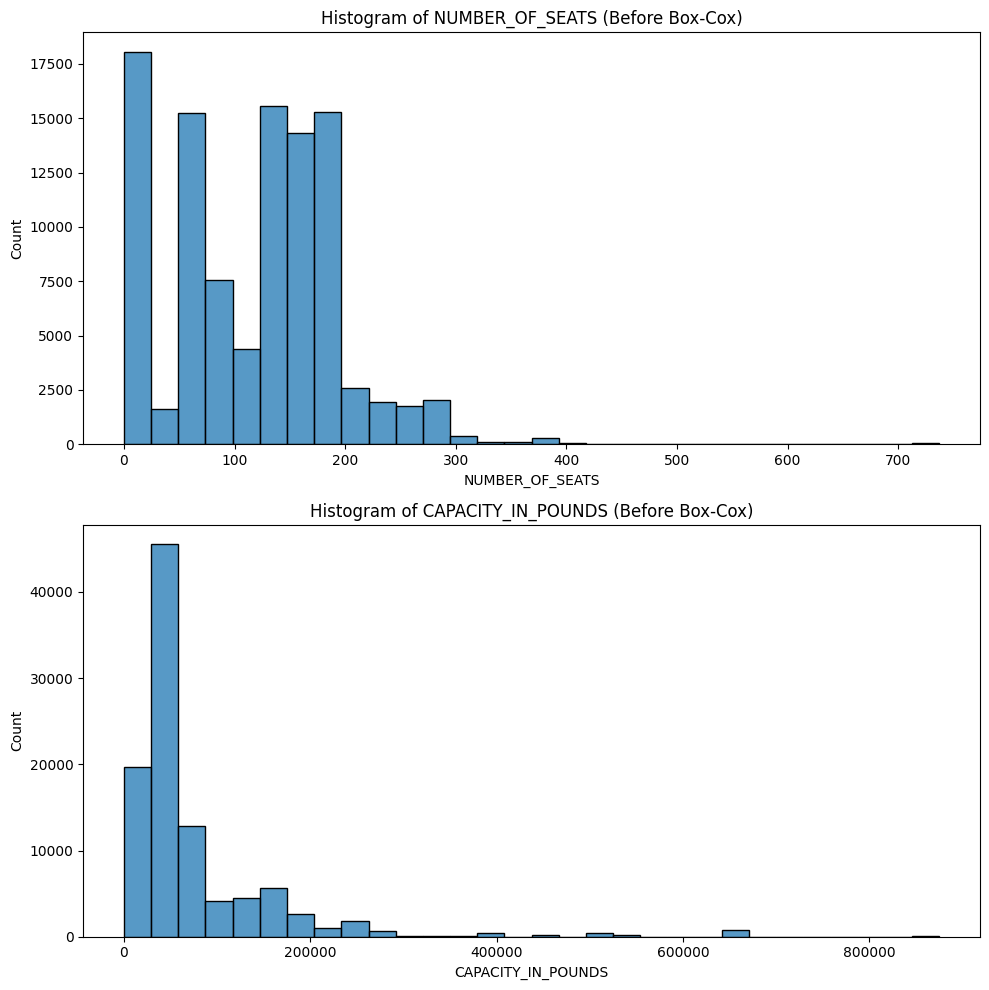

In [531]:
print("Skewness for NUMBER_OF_SEATS:", aircraft_cleaned['NUMBER_OF_SEATS'].skew())
print("Skewness for CAPACITY_IN_POUNDS:", aircraft_cleaned['CAPACITY_IN_POUNDS'].skew())

# Plotting histograms
fig, axes = plt.subplots(2, 1, figsize=(10, 10))
sns.histplot(aircraft_cleaned['NUMBER_OF_SEATS'], bins = 30, ax=axes[0])
axes[0].set_title('Histogram of NUMBER_OF_SEATS (Before Box-Cox)')
sns.histplot(aircraft_cleaned['CAPACITY_IN_POUNDS'], bins = 30, ax=axes[1])
axes[1].set_title('Histogram of CAPACITY_IN_POUNDS (Before Box-Cox)')
plt.tight_layout()
plt.show()

<ipython-input-532-922906945fcf>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aircraft_cleaned.loc[seats_positive.index, 'NUMBER_OF_SEATS_BOXCOX'] = seats_boxcox
<ipython-input-532-922906945fcf>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aircraft_cleaned.loc[capacity_positive.index, 'CAPACITY_IN_POUNDS_BOXCOX'] = capacity_boxcox


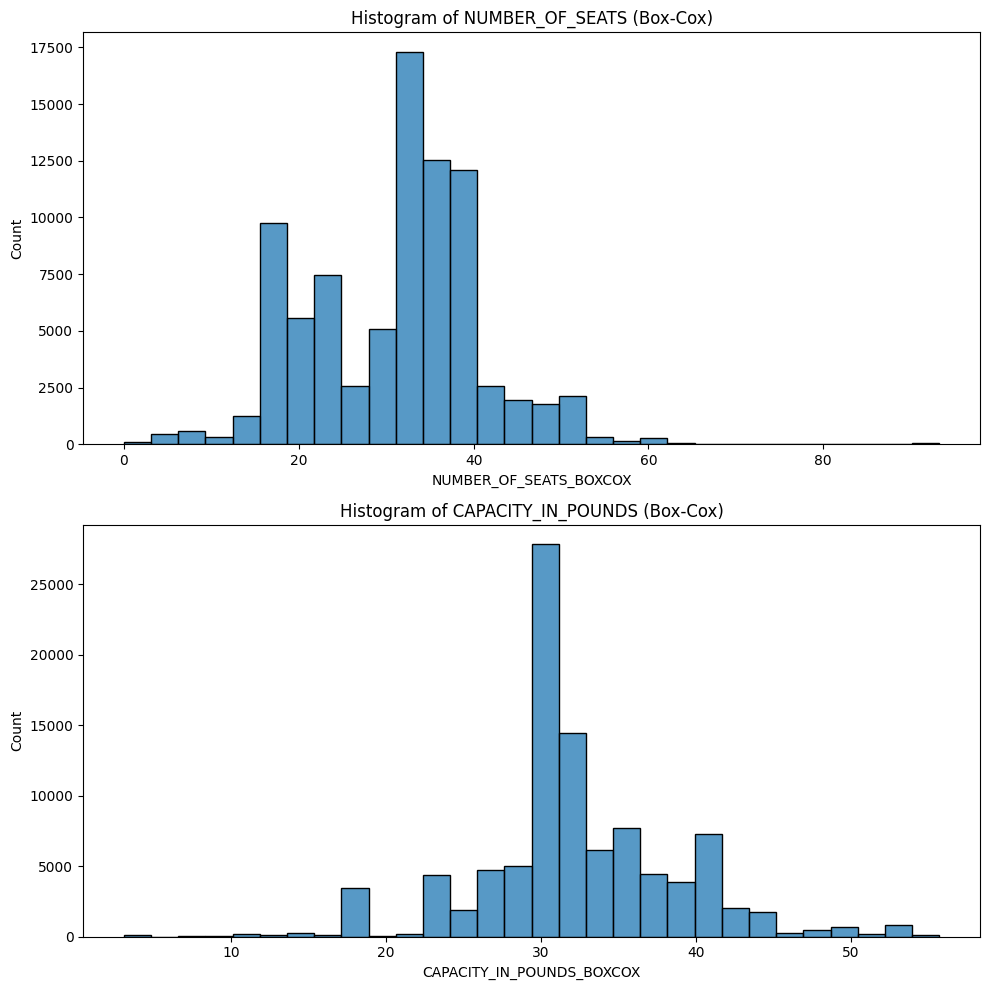

In [532]:
from scipy.stats import boxcox

# Data must be positive for boxcox
seats_positive = aircraft_cleaned['NUMBER_OF_SEATS'][aircraft_cleaned['NUMBER_OF_SEATS'] > 0]
capacity_positive = aircraft_cleaned['CAPACITY_IN_POUNDS'][aircraft_cleaned['CAPACITY_IN_POUNDS'] > 0]

# Boxcox
seats_boxcox, _ = boxcox(seats_positive)
capacity_boxcox, _ = boxcox(capacity_positive)

# Storing values
aircraft_cleaned.loc[seats_positive.index, 'NUMBER_OF_SEATS_BOXCOX'] = seats_boxcox
aircraft_cleaned.loc[capacity_positive.index, 'CAPACITY_IN_POUNDS_BOXCOX'] = capacity_boxcox

# Plotting histograms for the transformed variables
fig, axes = plt.subplots(2, 1, figsize=(10, 10))
sns.histplot(aircraft_cleaned['NUMBER_OF_SEATS_BOXCOX'], bins = 30, ax=axes[0])
axes[0].set_title('Histogram of NUMBER_OF_SEATS (Box-Cox)')
sns.histplot(aircraft_cleaned['CAPACITY_IN_POUNDS_BOXCOX'], bins = 30, ax=axes[1])
axes[1].set_title('Histogram of CAPACITY_IN_POUNDS (Box-Cox)')
plt.tight_layout()
plt.show()

# Before the Box-Cox transformation, the data was very skewed, especially for the CAPACITY_IN_POUNDS plot,
# which was also depicted by the skewness value. Both plots were  skewed to the right before transformation.
# After the transformation, the distributions look much closer to normal and are centered around similar values.

**Question 5**

In [533]:

q1 = aircraft_cleaned['NUMBER_OF_SEATS'].quantile(0.25)
q2 = aircraft_cleaned['NUMBER_OF_SEATS'].quantile(0.50)
q3 = aircraft_cleaned['NUMBER_OF_SEATS'].quantile(0.75)

aircraft_cleaned['SIZE'] = 'x'

# Apply conditions
aircraft_cleaned.loc[aircraft_cleaned['NUMBER_OF_SEATS'] < q1, 'SIZE'] = 'SMALL'
aircraft_cleaned.loc[(aircraft_cleaned['NUMBER_OF_SEATS'] >= q1) & (aircraft_cleaned['NUMBER_OF_SEATS'] < q2), 'SIZE'] = 'MEDIUM'
aircraft_cleaned.loc[(aircraft_cleaned['NUMBER_OF_SEATS'] >= q2) & (aircraft_cleaned['NUMBER_OF_SEATS'] < q3), 'SIZE'] = 'LARGE'
aircraft_cleaned.loc[aircraft_cleaned['NUMBER_OF_SEATS'] >= q3, 'SIZE'] = 'XLARGE'


<ipython-input-533-fc2c94446bc2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aircraft_cleaned['SIZE'] = 'x'


In [534]:
# OPERATING_STATUS
# Calculating proportion of aircrafts
total_small = len(aircraft_cleaned[aircraft_cleaned['SIZE'] == 'SMALL'])
total_medium = len(aircraft_cleaned[aircraft_cleaned['SIZE'] == 'MEDIUM'])
total_large = len(aircraft_cleaned[aircraft_cleaned['SIZE'] == 'LARGE'])
total_xlarge = len(aircraft_cleaned[aircraft_cleaned['SIZE'] == 'XLARGE'])

# Number of aircrafts that are operating
y_small = len(aircraft_cleaned[(aircraft_cleaned['SIZE'] == 'SMALL') & (aircraft_cleaned['OPERATING_STATUS'] == 'Y')])
y_medium = len(aircraft_cleaned[(aircraft_cleaned['SIZE'] == 'MEDIUM') & (aircraft_cleaned['OPERATING_STATUS'] == 'Y')])
y_large = len(aircraft_cleaned[(aircraft_cleaned['SIZE'] == 'LARGE') & (aircraft_cleaned['OPERATING_STATUS'] == 'Y')])
y_xlarge = len(aircraft_cleaned[(aircraft_cleaned['SIZE'] == 'XLARGE') & (aircraft_cleaned['OPERATING_STATUS'] == 'Y')])


print('SMALL:', y_small / total_small)
print('MEDIUM:', y_medium / total_medium)
print('LARGE:', y_large / total_large)
print('XLARGE:', y_xlarge / total_xlarge)

SMALL: 0.9691650129751183
MEDIUM: 0.9476290661919404
LARGE: 0.966714048803601
XLARGE: 0.9694118573340682


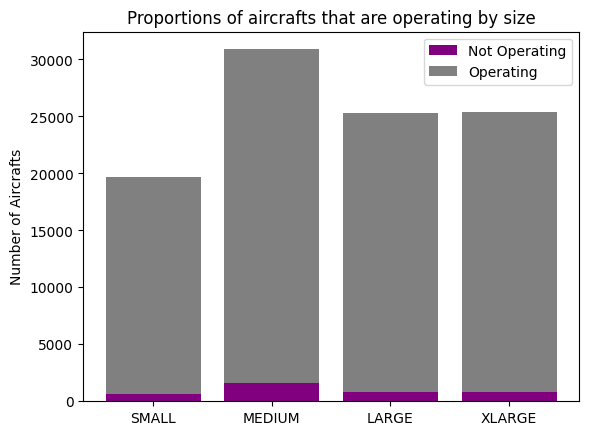

In [535]:
# Easier to visualize seeing against the total vs plotting proportions direction

total_vals = [total_small, total_medium, total_large, total_xlarge]
operating_vals = [y_small, y_medium, y_large, y_xlarge]

not_operating_small = total_small - y_small
not_operating_medium = total_medium - y_medium
not_operating_large = total_large - y_large
not_operating_xlarge = total_xlarge - y_xlarge

not_operating_vals = [not_operating_small, not_operating_medium, not_operating_large, not_operating_xlarge]

# Plotting
fig, ax = plt.subplots(1, 1)
labels = ['SMALL', 'MEDIUM', 'LARGE', 'XLARGE']
x = list(range(len(labels)))
plt.bar(x, not_operating_vals, color='purple', label='Not Operating')
plt.bar(x, operating_vals, bottom=not_operating_vals, color='grey', label='Operating')
plt.xticks(x, labels)
plt.ylabel('Number of Aircrafts')
plt.title('Proportions of aircrafts that are operating by size')
plt.legend()
plt.show()

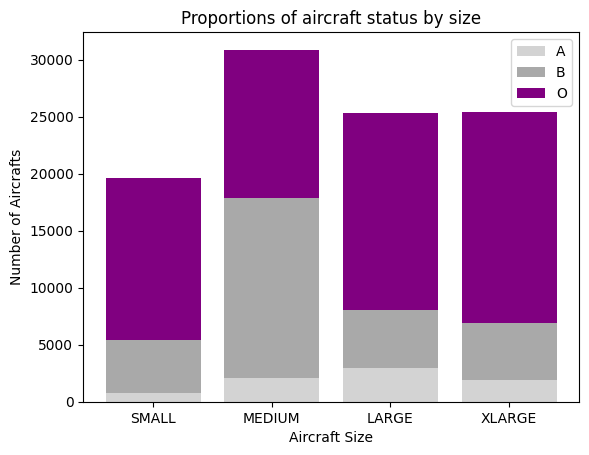

In [536]:
import numpy as np
# AIRCRAFT_STATUS

A_small = len(aircraft_cleaned[(aircraft_cleaned['SIZE'] == 'SMALL') & (aircraft_cleaned['AIRCRAFT_STATUS'] == 'A')])
A_medium = len(aircraft_cleaned[(aircraft_cleaned['SIZE'] == 'MEDIUM') & (aircraft_cleaned['AIRCRAFT_STATUS'] == 'A')])
A_large = len(aircraft_cleaned[(aircraft_cleaned['SIZE'] == 'LARGE') & (aircraft_cleaned['AIRCRAFT_STATUS'] == 'A')])
A_xlarge = len(aircraft_cleaned[(aircraft_cleaned['SIZE'] == 'XLARGE') & (aircraft_cleaned['AIRCRAFT_STATUS'] == 'A')])

B_small = len(aircraft_cleaned[(aircraft_cleaned['SIZE'] == 'SMALL') & (aircraft_cleaned['AIRCRAFT_STATUS'] == 'B')])
B_medium = len(aircraft_cleaned[(aircraft_cleaned['SIZE'] == 'MEDIUM') & (aircraft_cleaned['AIRCRAFT_STATUS'] == 'B')])
B_large = len(aircraft_cleaned[(aircraft_cleaned['SIZE'] == 'LARGE') & (aircraft_cleaned['AIRCRAFT_STATUS'] == 'B')])
B_xlarge = len(aircraft_cleaned[(aircraft_cleaned['SIZE'] == 'XLARGE') & (aircraft_cleaned['AIRCRAFT_STATUS'] == 'B')])

O_small = len(aircraft_cleaned[(aircraft_cleaned['SIZE'] == 'SMALL') & (aircraft_cleaned['AIRCRAFT_STATUS'] == 'O')])
O_medium = len(aircraft_cleaned[(aircraft_cleaned['SIZE'] == 'MEDIUM') & (aircraft_cleaned['AIRCRAFT_STATUS'] == 'O')])
O_large = len(aircraft_cleaned[(aircraft_cleaned['SIZE'] == 'LARGE') & (aircraft_cleaned['AIRCRAFT_STATUS'] == 'O')])
O_xlarge = len(aircraft_cleaned[(aircraft_cleaned['SIZE'] == 'XLARGE') & (aircraft_cleaned['AIRCRAFT_STATUS'] == 'O')])

# L us not included

A_combined = [A_small, A_medium, A_large, A_xlarge]
B_combined = [B_small, B_medium, B_large, B_xlarge]
O_combined = [O_small, O_medium, O_large, O_xlarge]


labels = ['SMALL', 'MEDIUM', 'LARGE', 'XLARGE']
x = list(range(len(labels)))

# Bottom possitions to stack on top of
bottom_AB = np.array(A_combined) + np.array(B_combined)

# Plotting
fig, ax = plt.subplots(1, 1)
labels = ['SMALL', 'MEDIUM', 'LARGE', 'XLARGE']
ax.bar(x, A_combined, label='A', color='lightgray')
ax.bar(x, B_combined, bottom=A_combined, label='B', color='darkgray')
ax.bar(x, O_combined, bottom=bottom_AB, label='O', color='purple')
ax.set_xlabel('Aircraft Size')
ax.set_ylabel('Number of Aircrafts')
ax.set_title('Proportions of aircraft status by size')
plt.xticks(x, labels)
plt.legend()
plt.show()

# Not plotting L because there are so few values and it is likely a mistake

In [537]:
# Printing Proportions

print('SMALL:')
print('A:', A_small / total_small)
print('B:', B_small / total_small)
print('O:', O_small / total_small)

print('MEDIUM:')
print('A:', A_medium / total_medium)
print('B:', B_medium / total_medium)
print('O:', O_medium / total_medium)

print('LARGE:')
print('A:', A_large / total_large)
print('B:', B_large / total_large)
print('O:', O_large / total_large)

print('XLARGE:')
print('A:', A_xlarge / total_xlarge)
print('B:', B_xlarge / total_xlarge)
print('O:', O_xlarge / total_xlarge)

SMALL:
A: 0.037704167302701874
B: 0.23563832493766854
O: 0.7266575077596296
MEDIUM:
A: 0.0661595727463991
B: 0.5132222042401683
O: 0.4195177213141285
LARGE:
A: 0.11509910763642107
B: 0.20109768617231305
O: 0.6820658611703387
XLARGE:
A: 0.07625383828045036
B: 0.19380363750885757
O: 0.7282103771356586
